# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

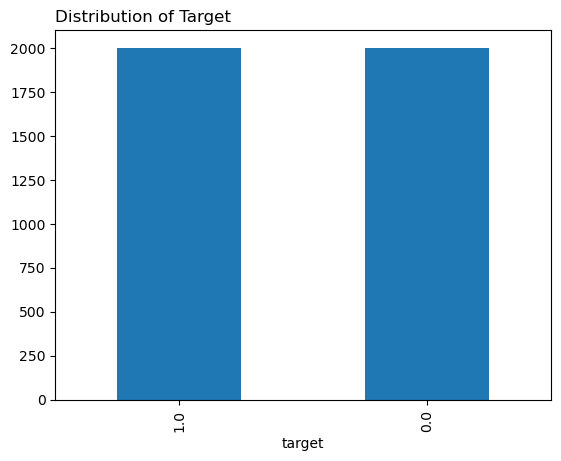

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_columns = ['var0', 'var1', 'var2']

# Creating a preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [8]:
# Created the preprocessing pipeline for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [9]:
# Combining both categorical and numeric transformers using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [col for col in X_train.columns if col not in categorical_columns]),
        ('cat', categorical_transformer, categorical_columns)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['var3', 'var4', 'var5', 'var6', 'var7',
                                  'var8', 'var9', 'var10', 'var11', 'var12',
                                  'var13', 'var14', 'var15', 'var16', 'var17',
                                  'var18', 'var19', 'var20', 'var21', 'var22',
                                  'var23', 'var24', 'var25', 'var26', 'var27',
                                  'var28', 'var29', 'var30', 'var31', 'var32', ...]),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['var0', 'var1', 'var2'])])

In [10]:
# Applying the transformations to the training data
X_train_transformed = preprocessor.fit_transform(X_train)

In [11]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_transformed)

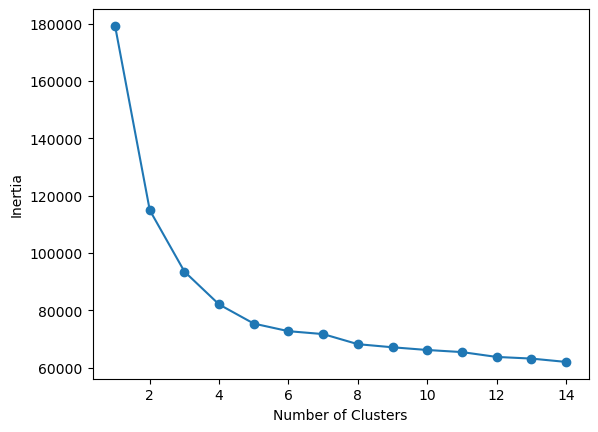

In [12]:
distortions = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X_scaled)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Based on the above information, I am choosing 5 as the optimum no of clusters. In the above elbow plot we can see the elbow point between the clusters 4 and 6 which is where the rate of decrease of inertia sharply changes. This basically means, even if we add more clusters there is not difference. 

My observations leads me to believe the elbow point is more at the 5. Hence, I am choosing 5 as optimal clusters.

In [13]:
optimal_k = 5
# Proceeding with PCA and k-means clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca

PCA(n_components=2)

In [14]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


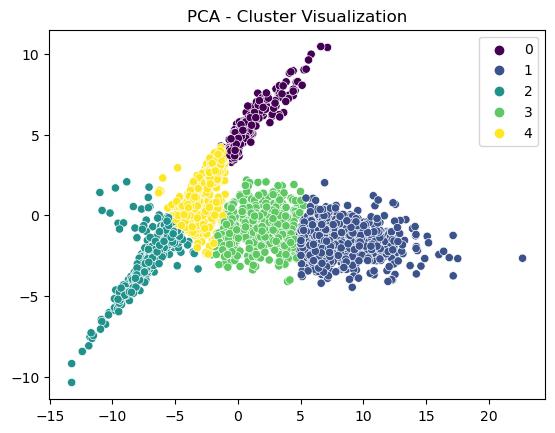

In [15]:
# plotting clusters
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('PCA - Cluster Visualization')
plt.show()

Conclusions:

- Cluster 0 which is represented in purple appears is separated and located on the upper part of the plot.
- Cluster 1(represented in blue) is located in right side of the graph and distinctly separated.
- Cluster 2( in Sky blue) is located in bottom side left of the plot. It is well separated and longest cluster.
- Cluster 3(Green) is in the middle of the plot. It is well separated with no overlap of points even though its in center of the plot.
- Cluster 4(Yellow) is left side of the plot and it is sitting in the middle of horizontal clusters 0 and 2. 

Based on the plot, We can conclude that 5 is a good choice for optimal cluster as we can see there is no or minimal overlap. And each cluster has its own position and unique space. This suggests that clustering algorithm has done a good job in grouping data points. 

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [17]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [19]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {np.mean(scores)}')

Cross-validation accuracy: 0.9403125000000001


/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


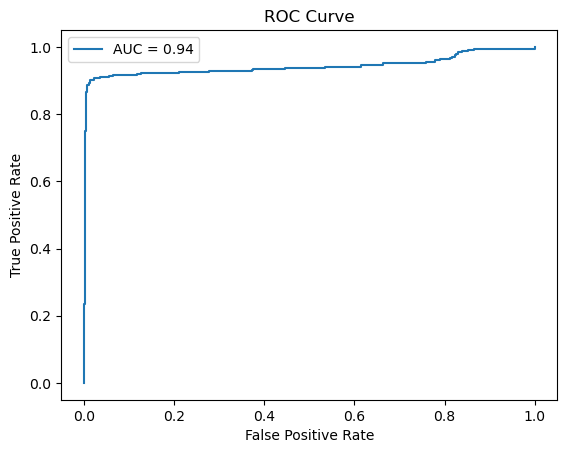

Accuracy: 0.92875, Precision: 0.9943342776203966, Recall: 0.8645320197044335


In [20]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score

clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
y_proba1 = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Conclusions:

- Model's Cross validation accuracy is 94.03% which is considered a high accuracy. 
- Area Under Curve is about 0.94. This is is very close to the perfect AUC score of 1. This suggests the model has high accuracy is distinguising negative and positive classes.
- Model's accuracy is 92.87%, Precision is 99.43% and recall is 86.45%. High precision tells the model is predicts positive class very effciently and 86.45% recall means there are some positive cases model is not capturing. 

To conclude, model is performing very well. 

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [22]:
categorical_features = ['var0', 'var1', 'var2'] 
numeric_features = [col for col in X_train.columns if col not in categorical_features]

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
    ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['var3', 'var4', 'var5', 'var6', 'var7',
                                  'var8', 'var9', 'var10', 'var11', 'var12',
                                  'var13', 'var14', 'var15', 'var16', 'var17',
                                  'var18', 'var19', 'var20', 'var21', 'var22',
                                  'var23', 'var24', 'var25', 'var26', 'var27',
                                  'var28', 'var29', 'var30', 'var31', 'var32', ...]),
                                ('cat', OneHotEncoder(),
                                 ['var0', 'var1', 'var2'])])

In [24]:
# Creating a pipeline with PCA
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
numeric_pipeline


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [25]:
# Combined all into one pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                                   'var30', 'var31', 'var32', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['var0', 'var1', 'var2'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [26]:
param_grid = {
    'classifier__C': np.logspace(-3, 3, 7)
}
grid_search1 = GridSearchCV(full_pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')

In [27]:
grid_search1.fit(X_train, y_train)
print("Best parameters found: ", grid_search1.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters found:  {'classifier__C': 1.0}


In [28]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Predicting probabilities and computing ROC-AUC
y_pred_proba2 = grid_search1.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba2)
roc_auc = auc(fpr, tpr)

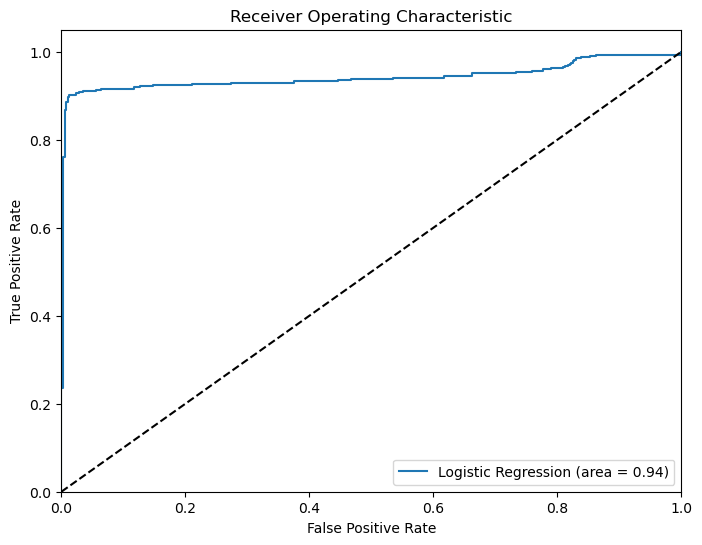

In [29]:
# Displaying ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
#Printing performance metrics
y_pred2 = grid_search1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.92875
Precision: 0.9943342776203966
Recall: 0.8645320197044335


Conclusions: 

- Area Under Curve is about 0.94. This is is very close to the perfect AUC score of 1. This not much different from the earlier model without gridsearch. This suggests the model has high accuracy is distinguising negative and positive classes.
- Model's accuracy is 92.75%, Precision is 99.43% and recall is 86.45%. High precision tells the model is predicts positive class very effciently. 

- 86.45% recall means there are some positive cases model is not capturing. 

However to conclude, there is no difference between the above model and this model with PCA in terms of metrics & performance.


# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['var3', 'var4', 'var5', 'var6', 'var7',
                                  'var8', 'var9', 'var10', 'var11', 'var12',
                                  'var13', 'var14', 'var15', 'var16', 'var17',
                                  'var18', 'var19', 'var20', 'var21', 'var22',
                                  'var23', 'var24', 'var25', 'var26', 'var27',
                                  'var28', 'var29', 'var30', 'var31', 'var32', ...]),
                                ('cat', OneHotEncoder(),
                                 ['var0', 'var1', 'var2'])])

In [32]:
# Pipeline that  preprocesses with k-means and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=10)),  # This will only be applied to the output of the preprocessor
    ('logistic', LogisticRegression(solver='liblinear', random_state=42))
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                                   'var30', 'var31', 'var32', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['var0', 'var1', 'var2'])])),
                ('kmeans', KMeans(n_clusters=10)),
                ('logistic',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [33]:
param_grid = {
    'kmeans__n_clusters': [5, 10, 15, 20],
    'logistic__C': np.logspace(-4, 4, 4)
}

grid_search2 = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)

In [34]:
grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['var3',
                                                                          'var4',
                                                                          'var5',
                                                                          'var6',
                                                                          'var7',
                                                                          'var8',
                                                                          'var9',
                                                                          'var10',
                                                                          'var11',
                                                                          'var12',
                                                                          'var13',
                                                                          'var14',
                                                                          'var15',
                                                                          'var16',
                                                                          'var17',
                                                                          'var18',
                                                                          'var19',
                                                                          'var20',
                                                                          'var21',
                                                                          'var22',
                                                                          'var23',
                                                                          'var24',
                                                                          'var25',
                                                                          'var26',
                                                                          'var27',
                                                                          'var28',
                                                                          'var29',
                                                                          'var30',
                                                                          'var31',
                                                                          'var32', ...]),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['var0',
                                                                          'var1',
                                                                          'var2'])])),
                                       ('kmeans', KMeans(n_clusters=10)),
                                       ('logistic',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'kmeans__n_clusters': [5, 10, 15, 20],
                         'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04])},
             verbose=1)

In [35]:
print("Best parameters found: ", grid_search2.best_params_)

Best parameters found:  {'kmeans__n_clusters': 5, 'logistic__C': 21.54434690031882}


In [36]:
# Predicting probabilities
y_pred_proba3 = grid_search2.best_estimator_.predict_proba(X_test)[:, 1]

# Computing ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba3)
roc_auc = auc(fpr, tpr)

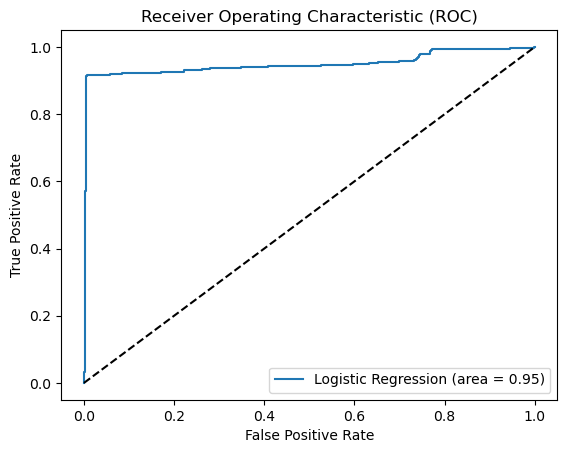

In [37]:
# curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [38]:
# Metrics performance
y_pred3 = grid_search2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 0.945
Precision: 0.994535519125683
Recall: 0.896551724137931


Conclusions: 

- ROC is well above the dotted line. And AUC score is 0.95 which very close to AUC score 1. This indicates model's ability to perform excellent on distinguish positive and negative cases.
- Model's accuracy is at 94.5%. This is high accuracy and better than the rest of models.
- Precision is at 99.45% which is not much different from the other models.
- Recall is at 89.90. This is where the real difference can be seen when compared to the rest of the models. There is an increase of 4%. This indicates model is able to identify 90% of actual positive cases.

To conclude, The model's performance is very good and better than the rest. 

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

Insert response



In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

def evaluate_model(model, X_test, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'{model_name} - AUC: {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    return train_accuracy, accuracy, precision, recall, auc_score

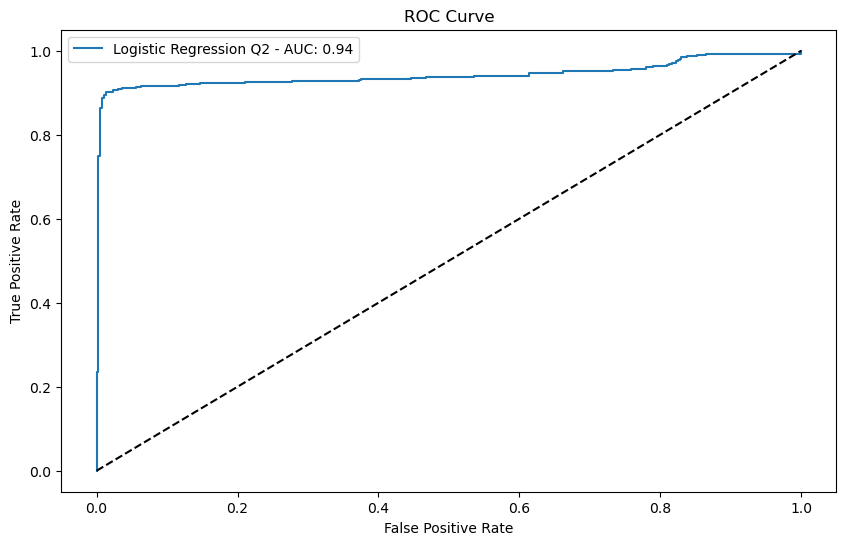

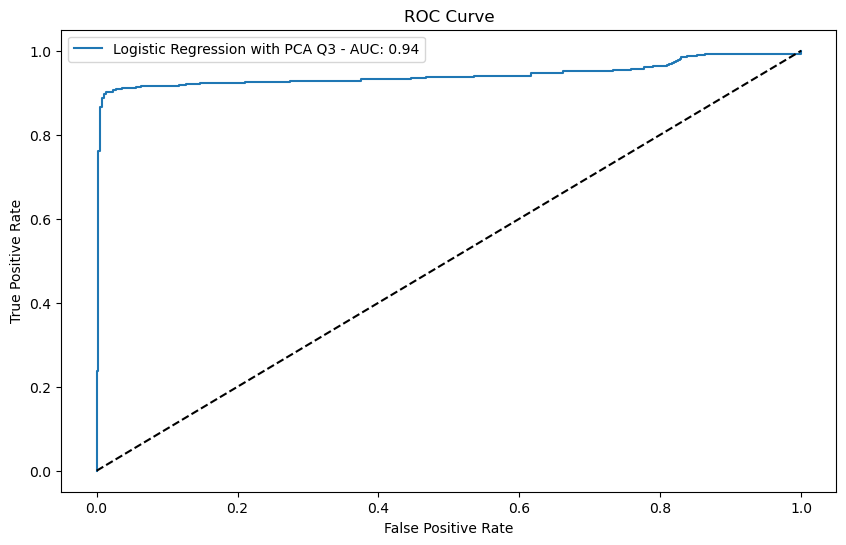

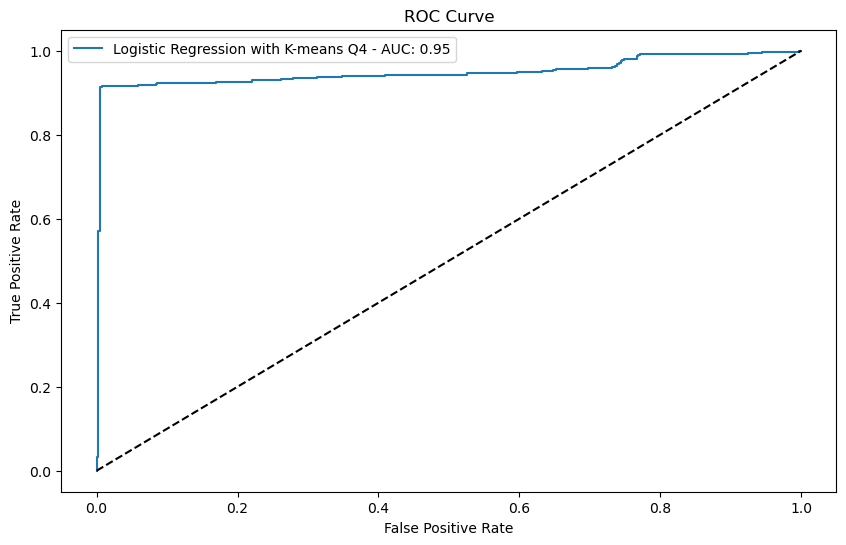

In [40]:
metrics_q2 = evaluate_model(clf, X_test, y_test, 'Logistic Regression Q2')
metrics_q3 = evaluate_model(grid_search1, X_test, y_test, 'Logistic Regression with PCA Q3')
metrics_q4 = evaluate_model(grid_search2, X_test, y_test, 'Logistic Regression with K-means Q4')


In [41]:
#DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression Q2', 'Logistic Regression with PCA Q3', 'Logistic Regression with K-means Q4'],
    'Train Accuracy': [metrics_q2[0], metrics_q3[0], metrics_q4[0]],
    'Test Accuracy': [metrics_q2[1], metrics_q3[1], metrics_q4[1]],
    'Precision': [metrics_q2[2], metrics_q3[2], metrics_q4[2]],
    'Recall': [metrics_q2[3], metrics_q3[3], metrics_q4[3]],
    'AUC': [metrics_q2[4], metrics_q3[4], metrics_q4[4]]
})

print(metrics_df.to_string(index=False))


                              Model  Train Accuracy  Test Accuracy  Precision   Recall      AUC
             Logistic Regression Q2        0.943438        0.92875   0.994334 0.864532 0.941974
    Logistic Regression with PCA Q3        0.943125        0.92875   0.994334 0.864532 0.942043
Logistic Regression with K-means Q4        0.955313        0.94500   0.994536 0.896552 0.948663


### Recommendations

I would recommend to choose the Logistic regression model with K - means clustering for the following reasons:

- Logistic Regression model with K-means shows the highest test accuracy and AUC score for the unseen data. This suggests the model is generalization capabilities are high. This means the model has highest ability to discriminate between classes.


- While all the model shows similar precision, Logistic regression model with K-means has show singnificantly higher recall value than other models. This is important as the chances of missing positive instances is less with this model than others.


- The difference between the Training Accuracy and Testing accuracy smallest when compared to other models. This means this model is not overfitting and less overfitting if any than other models. 